In [52]:
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
df=pd.read_csv('GLASS.DATASET',index_col='id')
df

,RI,NA,MG,AI,SI,K,CA,BA,FE,Type
id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   NA      214 non-null    float64
 2   MG      214 non-null    float64
 3   AI      214 non-null    float64
 4   SI      214 non-null    float64
 5   K       214 non-null    float64
 6   CA      214 non-null    float64
 7   BA      214 non-null    float64
 8   FE      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [4]:
y=df['Type']
y

id
1      1
2      1
3      1
4      1
5      1
      ..
210    7
211    7
212    7
213    7
214    7
Name: Type, Length: 214, dtype: int64

In [6]:
df1=df.drop('Type',axis=1)
df1

,RI,NA,MG,AI,SI,K,CA,BA,FE
id,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0


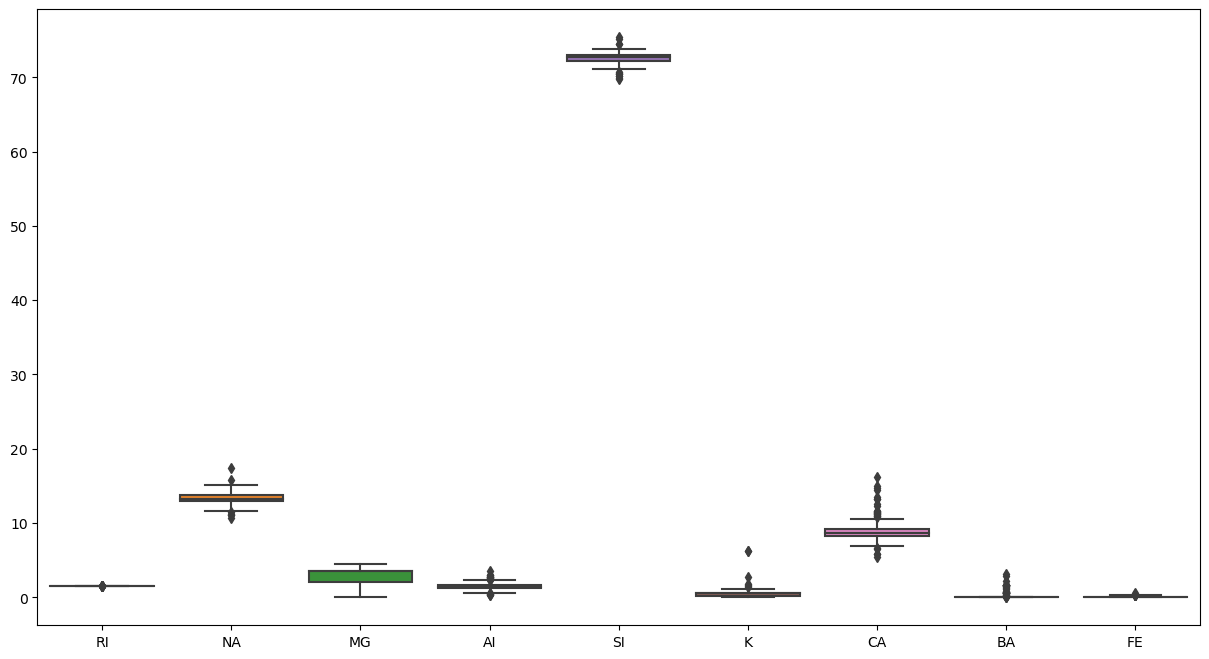

In [20]:
fig=plt.figure(figsize=(15,8))
sns.boxplot(data=df1)
plt.show(fig)


In [24]:
from sklearn import  preprocessing
x=df1.values
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled=min_max_scaler.fit_transform(x)
df=pd.DataFrame(x_scaled)
df

,0,1,2,3,4,5,6,7,8
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


In [26]:
df1.describe()

,RI,NA,MG,AI,SI,K,CA,BA,FE
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


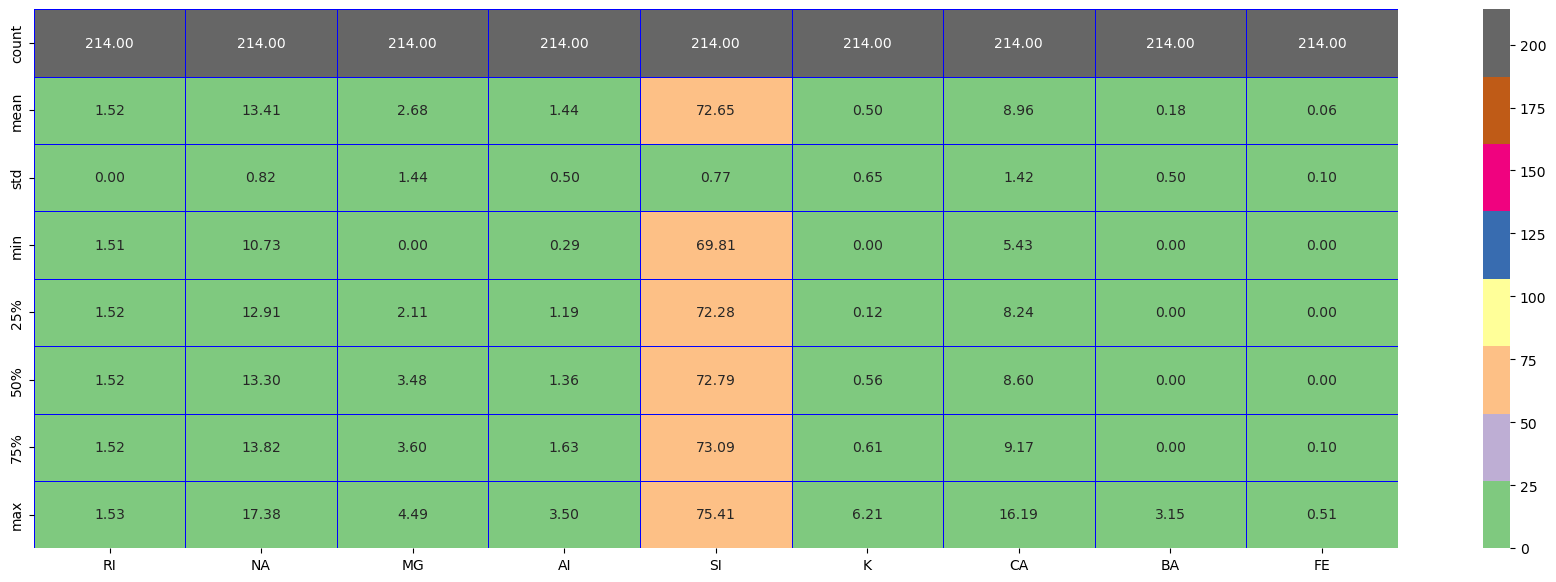

In [30]:
plt.figure(figsize=(22,7))
sns.heatmap(df1.describe(),annot=True,linewidth=0.5,linecolor='blue',fmt='0.2f',cmap='Accent')
plt.show()

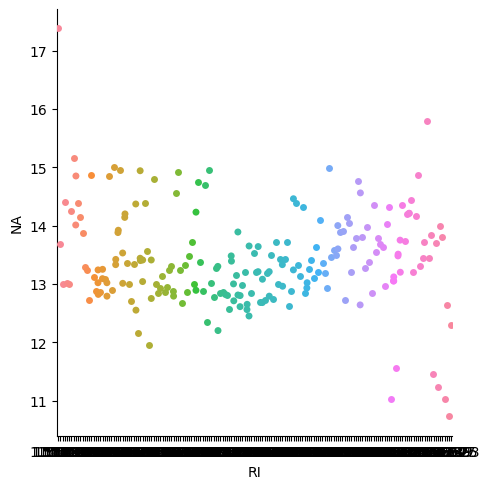

In [35]:
sns.catplot(x='RI',y='NA',data=df1)
plt.show()

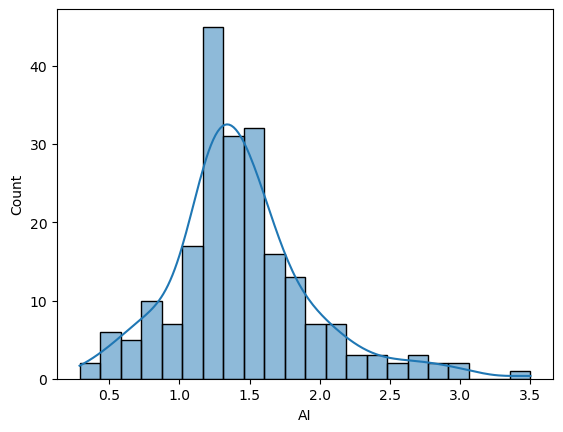

In [39]:
sns.histplot(x='AI',data=df1,kde=True)
plt.show()

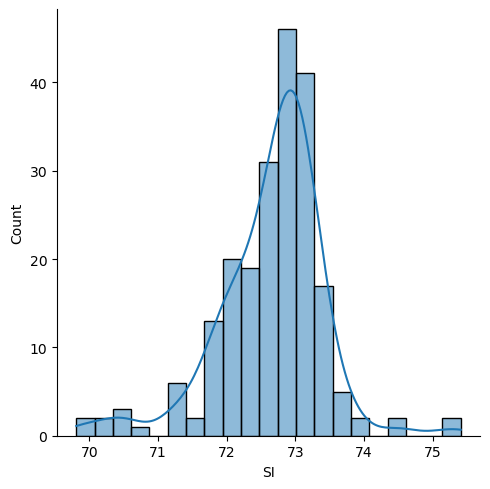

In [40]:
sns.displot(x='SI',data=df1,kde=True)
plt.show()

In [44]:
# training and testing the data
x_train,x_test,y_train,y_test=train_test_split(df1,y,test_size=0.30,random_state=42)
print((x_train.shape))

(149, 9)


In [49]:
from sklearn.metrics import accuracy_score

In [55]:
cif=DecisionTreeClassifier(criterion='entropy')
cif=cif.fit(x_train,y_train)
y_pred=cif.predict(x_test)
accuracy_score(y_test,y_pred)

0.676923076923077

# CART

In [56]:
import math
cif=DecisionTreeClassifier()
cif.fit(x_train,y_train)
ypred=cif.predict(x_test)
asc=accuracy_score(y_test,ypred)
mse=mean_squared_error(y_test,ypred)
rmse=math.sqrt(mse)
print(asc,mse,rmse)

0.5846153846153846 3.169230769230769 1.7802333468483196


In [58]:
df.fillna(df.mean(),inplace=True)
df

,0,1,2,3,4,5,6,7,8
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


In [59]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[16  2  0  0  0  1]
 [ 7 11  1  0  1  3]
 [ 1  0  3  0  0  0]
 [ 0  3  0  3  0  0]
 [ 0  1  0  0  2  0]
 [ 1  0  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.64      0.84      0.73        19
           2       0.65      0.48      0.55        23
           3       0.75      0.75      0.75         4
           5       1.00      0.50      0.67         6
           6       0.67      0.67      0.67         3
           7       0.69      0.90      0.78        10

    accuracy                           0.68        65
   macro avg       0.73      0.69      0.69        65
weighted avg       0.69      0.68      0.67        65



# Logistic regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [64]:
cif=LogisticRegression(random_state=0,solver='lbfgs',multi_class='multinomial').fit(x_train,y_train)


In [65]:
cif.score(x_test,y_test)

0.6615384615384615

# Random forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
from math import sqrt

In [68]:
cif=RandomForestClassifier(n_estimators=150,max_depth=3,random_state=0)
cif.fit(x_train,y_train)
ypred=cif.predict(x_test)
accuracy_score(y_test,ypred)
asc=accuracy_score(y_test,ypred)
msc=mean_squared_error(y_test,ypred)
rmse=sqrt(mse)
print(asc,mse,rmse)

0.6923076923076923 3.169230769230769 1.7802333468483196


In [78]:
import pickle 
filename='Glass file'
pickle.dump(cif,open(filename,'wb'))

In [80]:
load_model=pickle.load(open('Glass file','rb'))
result=load_model.score(x_test,y_test)
print(result*100)

69.23076923076923
